In [1]:
import csv
import itertools
import time
import timeit

import numpy as np

from skimage.filters import threshold_mean
from skimage.morphology import skeletonize
from skimage import graph as skgraph

import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

from utils.plotting import *
from utils.process import *


## Read in MNIST data

In [2]:
mnist_filename = '../data/mnist/mnist_test.csv'
mnist_images_raw, mnist_labels = read_in_mnist(mnist_filename)


In [3]:
print(len(mnist_images_raw))
print(len(mnist_labels))


10000
10000


In [4]:
idx_0 = 10
idx_4 = 4
idx_5 = 694
idx_8 = 3406

img_0 = mnist_images_raw[idx_0]
img_4 = mnist_images_raw[idx_4]
img_5 = mnist_images_raw[idx_5]
img_8 = mnist_images_raw[idx_8]

label_0 = mnist_labels[idx_0]
label_4 = mnist_labels[idx_4]
label_5 = mnist_labels[idx_5]
label_8 = mnist_labels[idx_8]


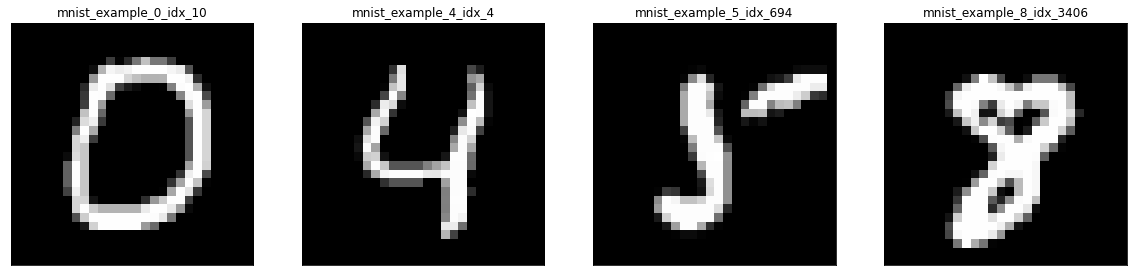

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15))

ax[0].imshow(img_0, cmap="gray")
ax[1].imshow(img_4, cmap="gray")
ax[2].imshow(img_5, cmap="gray")
ax[3].imshow(img_8, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])

ax[0].set_title("mnist_example_{}_idx_{}".format(label_0, idx_0))
ax[1].set_title("mnist_example_{}_idx_{}".format(label_4, idx_4))
ax[2].set_title("mnist_example_{}_idx_{}".format(label_5, idx_5))
ax[3].set_title("mnist_example_{}_idx_{}".format(label_8, idx_8))

plt.show()


## Create image binaries

In [6]:
def create_binaries(img):
    """
    Given an input image, binarize it and return the result.
    """
    thresh = threshold_mean(img)
    binary = img > thresh
    
    return binary


In [7]:
binary_0 = create_binaries(img_0)
binary_4 = create_binaries(img_4)
binary_5 = create_binaries(img_5)
binary_8 = create_binaries(img_8)


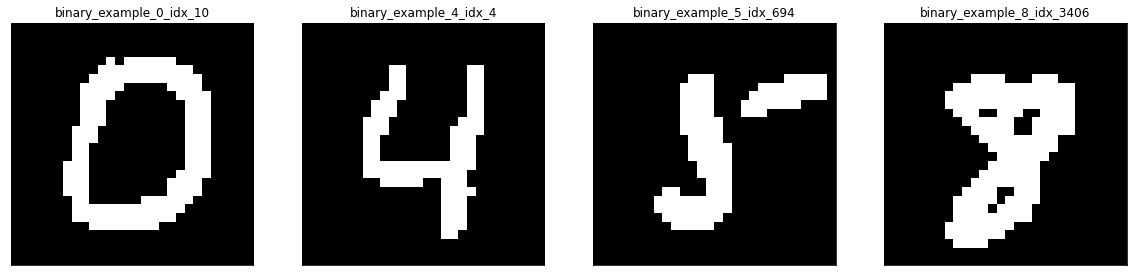

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15))

ax[0].imshow(binary_0, cmap="gray")
ax[1].imshow(binary_4, cmap="gray")
ax[2].imshow(binary_5, cmap="gray")
ax[3].imshow(binary_8, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("binary_example_{}_idx_{}".format(label_0, idx_0))
ax[1].set_title("binary_example_{}_idx_{}".format(label_4, idx_4))
ax[2].set_title("binary_example_{}_idx_{}".format(label_5, idx_5))
ax[3].set_title("binary_example_{}_idx_{}".format(label_8, idx_8))

plt.show()


## Calculate skeleton

In [9]:
def create_skeletons(binary):
    """
    Given an input image binary, skeletonize it, pad it, and return the result.
    """
    skeleton = skeletonize(binary)
    skeleton = pad_image(skeleton)
    
    return skeleton


In [10]:
skeleton_0 = create_skeletons(binary_0)
skeleton_4 = create_skeletons(binary_4)
skeleton_5 = create_skeletons(binary_5)
skeleton_8 = create_skeletons(binary_8)


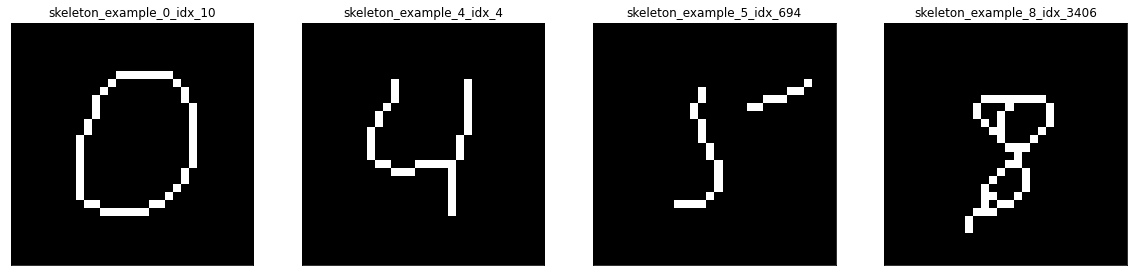

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15))

ax[0].imshow(skeleton_0, cmap="gray")
ax[1].imshow(skeleton_4, cmap="gray")
ax[2].imshow(skeleton_5, cmap="gray")
ax[3].imshow(skeleton_8, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("skeleton_example_{}_idx_{}".format(label_0, idx_0))
ax[1].set_title("skeleton_example_{}_idx_{}".format(label_4, idx_4))
ax[2].set_title("skeleton_example_{}_idx_{}".format(label_5, idx_5))
ax[3].set_title("skeleton_example_{}_idx_{}".format(label_8, idx_8))

plt.show()


## Convert image skeletons into skeleton graphs

In [12]:
# then convert to scipy sparse array
skeleton_array_0, coordinates_0 = create_skeleton_graph(skeleton_0, connectivity=2)
skeleton_array_4, coordinates_4 = create_skeleton_graph(skeleton_4, connectivity=2)
skeleton_array_5, coordinates_5 = create_skeleton_graph(skeleton_5, connectivity=2)
skeleton_array_8, coordinates_8 = create_skeleton_graph(skeleton_8, connectivity=2)

# create graph from scipy sparse array, get node locations and save as dict
skeleton_graph_0 = nx.from_scipy_sparse_array(skeleton_array_0)
skeleton_graph_4 = nx.from_scipy_sparse_array(skeleton_array_4)
skeleton_graph_5 = nx.from_scipy_sparse_array(skeleton_array_5)
skeleton_graph_8 = nx.from_scipy_sparse_array(skeleton_array_8)


In [13]:
# then convert to scipy sparse array
skeleton_array_0, coordinates_0 = create_skeleton_graph(skeleton_0, connectivity=2)

# create graph from scipy sparse array, get node locations and save as dict
skeleton_graph_0 = nx.from_scipy_sparse_array(skeleton_array_0)


## Path segmentation

### Example 8: complicated junction and multiple loops

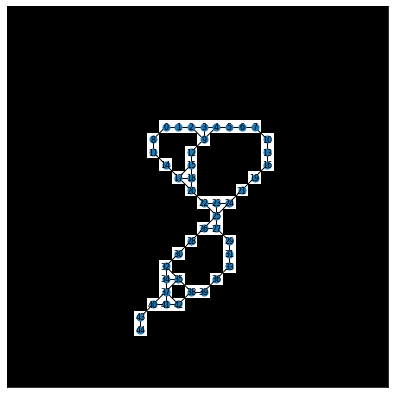

In [14]:
plot_networkx_graph(skeleton_8, skeleton_graph_8, coordinates_8)


In [15]:
# result_dict_8 = TGGLinesPlus(img_8)
result_dict_8 = TGGLinesPlus(img_8, idx_8)
print(list(result_dict_8.keys()))


['all_paths_list', 'node_degrees', 'node_types', 'path_seg_graphs_list', 'path_seg_endpoints_list', 'search_by_node', 'skeleton', 'skeleton_coordinates', 'skeleton_graph', 'skeleton_subgraphs']


In [16]:
# these methods need to be fixed since we starting saving subgraphs
# plot_junctions(result_dict_8, label_8, idx_8)
# plot_cliques(result_dict_8, label_8, idx_8)
# plot_primary_junctions(result_dict_8, label_8, idx_8)
# plot_removed_edges(result_dict_8, label_8, idx_8)


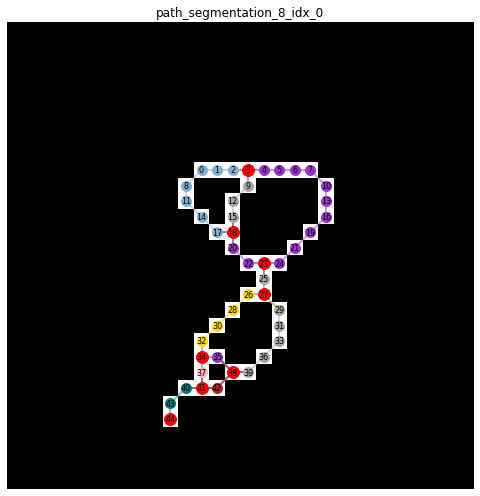

In [17]:
plot_graph_paths(result_dict_8, label_8, idx_8)


### Example 5: separated subgraphs

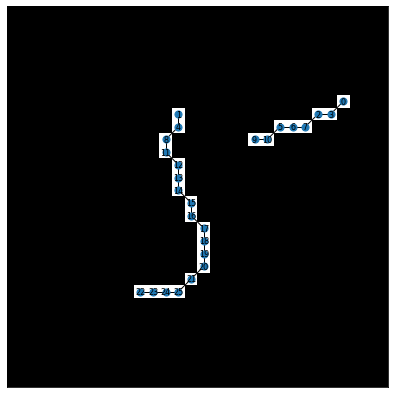

In [18]:
plot_networkx_graph(skeleton_5, skeleton_graph_5, coordinates_5)


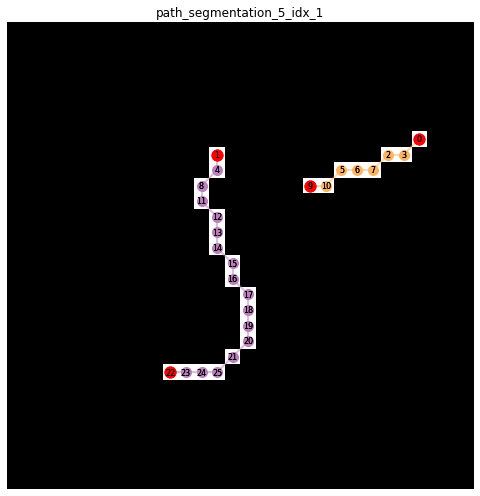

In [19]:
# result_dict_5 = TGGLinesPlus(img_5)
result_dict_5 = TGGLinesPlus(img_5, idx_5)
plot_graph_paths(result_dict_5, label_5, idx_5)


### Example 0: a continuous loop with no junctions or end nodes

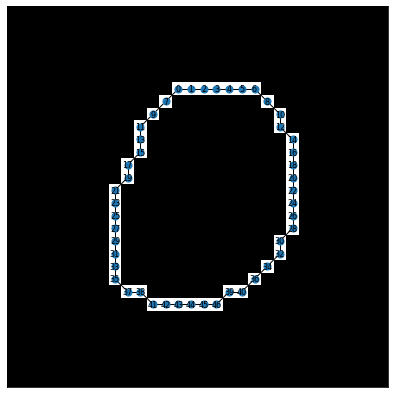

In [20]:
plot_networkx_graph(skeleton_0, skeleton_graph_0, coordinates_0)


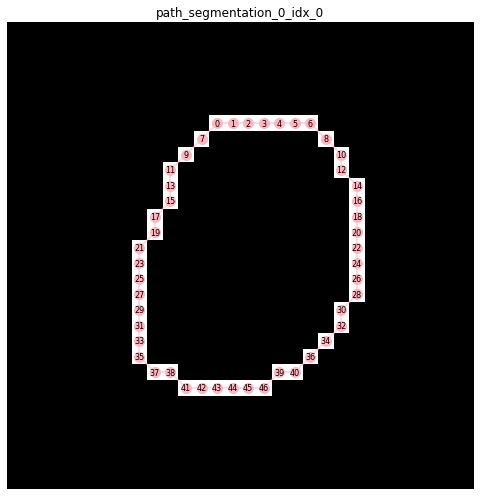

In [21]:
# result_dict_0 = TGGLinesPlus(img_0, idx_0)
result_dict_0 = TGGLinesPlus(img_0, idx_0)
plot_graph_paths(result_dict_0, label_0, idx_0)


### Example 4: a junction with no loops

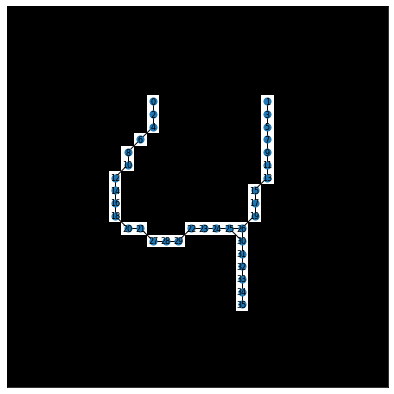

In [22]:
plot_networkx_graph(skeleton_4, skeleton_graph_4, coordinates_4)


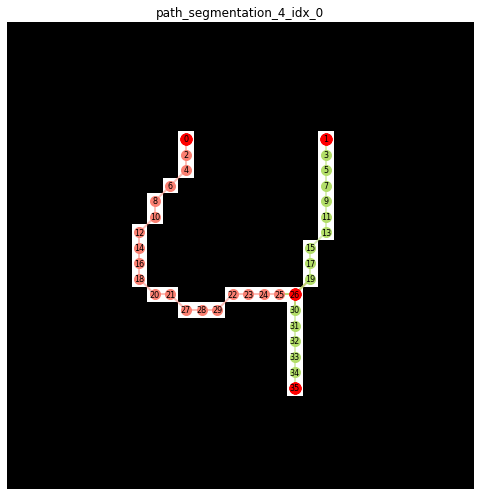

In [23]:
# result_dict_4 = TGGLinesPlus(img_4)
result_dict_4 = TGGLinesPlus(img_4, idx_4)
plot_graph_paths(result_dict_4, label_4, idx_4)


### Another interesting example: a graph with multiple loops

In [24]:
idx_5165 = 5165
img_5165 = mnist_images_raw[idx_5165]
label_5165 = mnist_labels[idx_5165]

# result_dict_5165 = TGGLinesPlus(img_5165)
result_dict_5165 = TGGLinesPlus(img_5165, idx_5165)


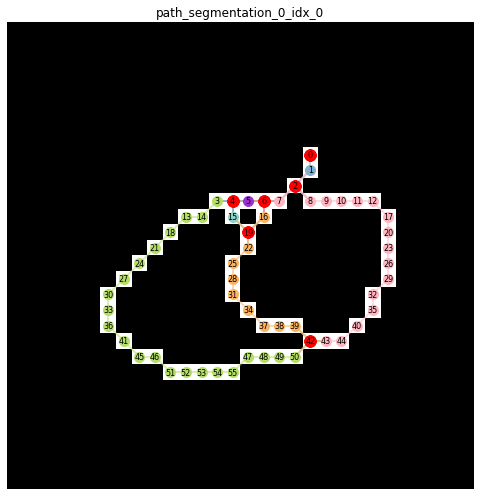

In [25]:
plot_graph_paths(result_dict_5165, label_5165, idx_5165)


### Two examples with cycles

In [26]:
# these are some problem images: 1911, 5061
idx_1911 = 1911
idx_5061 = 5061

label_1911 = mnist_labels[idx_1911]
label_5061 = mnist_labels[idx_5061]

img_1911 = mnist_images_raw[idx_1911]
img_5061 = mnist_images_raw[idx_5061]


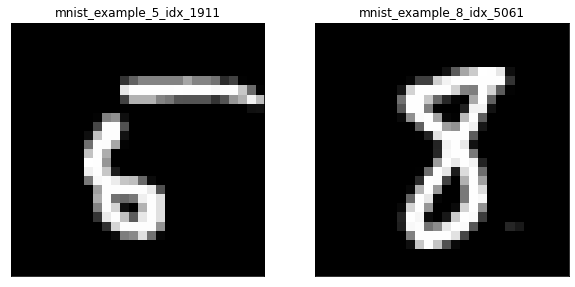

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

ax[0].imshow(img_1911, cmap="gray")
ax[1].imshow(img_5061, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])

ax[0].set_title("mnist_example_{}_idx_{}".format(label_1911, idx_1911))
ax[1].set_title("mnist_example_{}_idx_{}".format(label_5061, idx_5061))

plt.show()


In [28]:
binary_1911 = create_binaries(img_1911)
binary_5061 = create_binaries(img_5061)


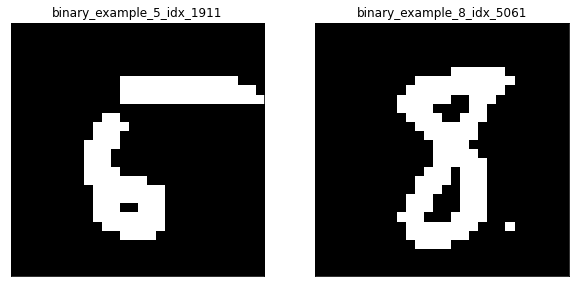

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

ax[0].imshow(binary_1911, cmap="gray")
ax[1].imshow(binary_5061, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("binary_example_{}_idx_{}".format(label_1911, idx_1911))
ax[1].set_title("binary_example_{}_idx_{}".format(label_5061, idx_5061))

plt.show()


In [30]:
skeleton_1911 = create_skeletons(binary_1911)
skeleton_5061 = create_skeletons(binary_5061)


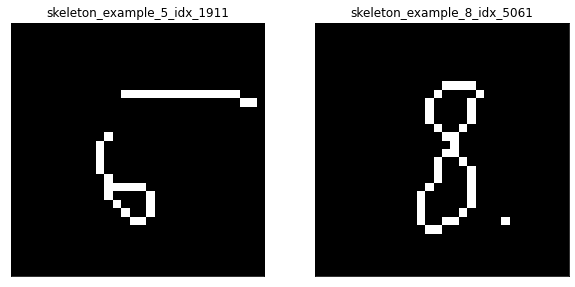

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

ax[0].imshow(skeleton_1911, cmap="gray")
ax[1].imshow(skeleton_5061, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("skeleton_example_{}_idx_{}".format(label_1911, idx_1911))
ax[1].set_title("skeleton_example_{}_idx_{}".format(label_5061, idx_5061))

plt.show()


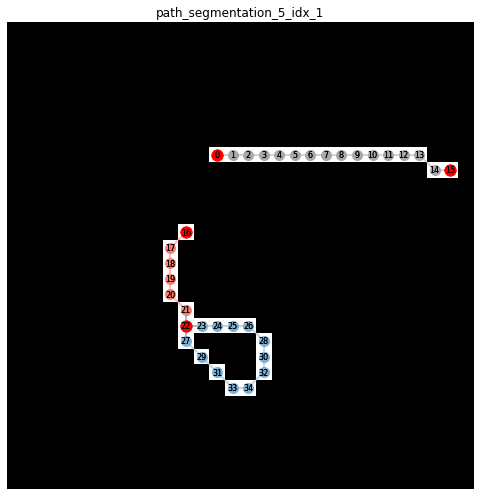

In [32]:
result_dict_1911 = TGGLinesPlus(img_1911, idx_1911)
plot_graph_paths(result_dict_1911, label_1911, idx_1911)


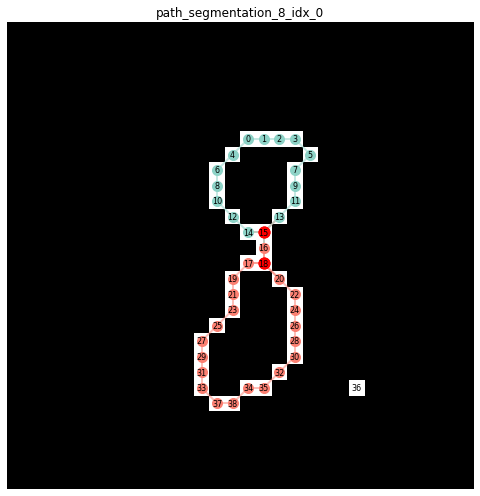

In [33]:
result_dict_5061 = TGGLinesPlus(img_5061, idx_5061)
plot_graph_paths(result_dict_5061, label_5061, idx_5061)


## A full processing pipeline

### Test the full processing pipeline's runtime

`timeit.default_timer()` measurements can be affected by other programs running on the same machine, so the best thing to do when accurate timing is necessary is to repeat the timing a few times and use the best time. The `-r` option is good for this; the default of 5 repetitions is probably enough in most cases. You can use `time.process_time()` to measure CPU time.

But we can only use `-r` for repetitions from the command line.

In [34]:
start = timeit.default_timer()
#start = time.process_time()

#result_dict_list = [TGGLinesPlus(img) for img in mnist_images_raw]
result_dict_list = [TGGLinesPlus(img, idx) for idx, img in enumerate(mnist_images_raw)]

stop = timeit.default_timer()
#stop = time.process_time()

print(f"Time to run: {(stop - start):.5f}s")  


Error on image 110, list index out of range
Error on image 572, list index out of range
Error on image 1229, list index out of range
Error on image 1267, list index out of range
Error on image 2179, list index out of range
Error on image 2203, list index out of range
Error on image 2254, list index out of range
Error on image 2543, list index out of range
Error on image 2744, list index out of range
Error on image 2918, list index out of range
Error on image 3046, list index out of range
Error on image 3871, list index out of range
Error on image 3949, list index out of range
Error on image 4825, list index out of range
Error on image 5950, list index out of range
Error on image 6343, list index out of range
Error on image 6347, list index out of range
Error on image 6359, list index out of range
Error on image 6372, list index out of range
Error on image 6435, list index out of range
Error on image 6442, list index out of range
Error on image 6493, list index out of range
Error on ima

In [40]:
mnist_binaries = [create_binaries(img) for img in mnist_images_raw]
mnist_skeletons = [create_skeletons(binary) for binary in mnist_binaries]

error_list = [110, 572, 1229, 1267, 2179, 2203, 2254, 2543, 2744, 2918,
              3046, 3871, 3949, 4825, 5950, 6343, 6347, 6359, 6372, 6435, 
              6442, 6493, 6514, 6603, 6851, 6864, 7146, 7689, 7765, 7872,
              7901, 7941, 8027, 8147, 8927, 9042, 9055, 9126, 9354, 9394, 9673]

print(len(error_list))


41


In [50]:
# import os
# os.chdir("../../Desktop/problem_images/")
# print(os.getcwd())
# for idx in error_list:
#     label = mnist_labels[idx]
#     img = mnist_skeletons[idx]
    
#     fig, ax = plt.subplots(figsize=(7, 7))

#     ax.imshow(img, cmap="gray")
#     ax.set_xticks([])
#     ax.set_yticks([])

#     title = "problem_image_{}_idx_{}".format(label, idx)
#     ax.set_title(title)

#     plt.savefig(title+".pdf", bbox_inches='tight', format='pdf')
#     plt.close(fig)
    